In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Deloitte Backup/Financial Data Clustering Paper/"

In [4]:
es600 = pd.read_csv(f"{path}230507_es600_final.csv")

# 1. Data Pre-Processing

In [ ]:
es600.shape[0]

7801

In [ ]:
#filtering for derivedEmissions in the STOXX600 dataset
es600 = es600.loc[es600.derivedEmissions.notna()]

In [ ]:
es600.shape[0]

6239

In [ ]:
#applying condition that 80% at least for one column must be non-null and drop the rest of columns
cond = es600.count() < es600.shape[0] * 0.8
drop_columns = es600.count()[cond].index.to_list()
es600 = es600.drop(columns = drop_columns)
drop_columns

['Environmental Expenditures',
 'Environmental Provisions',
 'CO2e Indirect Emissions, Scope 3',
 'Environmental R&D Expenditures',
 'Direct Energy/Energy Purchased Direct',
 'Direct Energy/Energy Produced Direct',
 'Indirect Energy Use',
 'researchAndDevelopment',
 'shortTermInvestments',
 'rnd/sales',
 'capex/fixedAssets',
 'sga/sales']

In [ ]:
def filter_numeric_df(data: pd.DataFrame):

  df_numeric = data.select_dtypes(include = "number")
  df_numeric = df_numeric.drop(columns = ["Emission Reduction Processes/Policy Emissions Reduction",
                                          "Emission Reduction Objectives/Targets Emissions Reduction",
                                          "BusTRBCId",
                                          "econId"])

  return df_numeric

In [ ]:
def remove_outliers(data: pd.DataFrame, variables: list):

    df = data.copy()

    for col in variables:

        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[col] >= lower_bound) &
                (df[col] <= upper_bound)]

    return df

In [ ]:
def encode_categorical_variables(data: pd.DataFrame, variables: list):

  end_encoded_df = pd.DataFrame()

  for variable in variables:

    encoded_df = pd.get_dummies(data[[variable]].copy())
    end_encoded_df = pd.concat([end_encoded_df,encoded_df], axis = 1)

  data = data.drop(columns = variables)
  data = pd.concat([data, end_encoded_df], axis=1)

  return data

In [ ]:
data = encode_categorical_variables(data = es600.copy(), variables = ["econIdDesc","IncomeGroup"])

In [ ]:
data.head()

,OrgId,econId,OrgName_x,FisYear,Id_A4,OrgName_y,BusTRBCId,Emission Reduction Processes/Policy Emissions Reduction,Emission Reduction Objectives/Targets Emissions Reduction,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,ISOCountryCodeDerived,Region,GDP PPP,econIdDesc_Basic Materials,econIdDesc_Consumer Cyclicals,econIdDesc_Consumer Non-Cyclicals,econIdDesc_Energy,econIdDesc_Financials,econIdDesc_Healthcare,econIdDesc_Industrials,econIdDesc_Real Estate,econIdDesc_Technology,econIdDesc_Utilities,IncomeGroup_High income,IncomeGroup_Upper middle income
0,49048.0,54.0,Homeserve plc,2009,@STHST1,Homeserve plc,5420.0,1.0,0.0,13014.387,13014.387,4840.62,8173.767,17.559931,NaN,0.184400,0.184400,1.000000,0.196429,0.351852,0.000000,0.472973,0.000000,0.256757,0.100000,0.143082,0.209119,0.255906,741.141122,716.710039,5512.0,118.581777,118.581777,-36.038605,93.755374,79.207299,405.648795,11.697758,-50.569492,151.565244,773.669096,2.32973,-3.90851,15.99989,15.00036,15.99989,-5.63080,79.54975,93875.36284,90020.86357,0.70601,0.78560,5.822381,GBR,Europe & Central Asia,35043.594501,0,0,1,0,0,0,0,0,0,0,1,0
1,10836.0,54.0,Siemens AG,2009,@SIEME18,Siemens AG,5440.0,1.0,1.0,2574000.000,2574000.000,1115000.00,1459000.000,22.943176,23800000.0,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,189261.72840,226259.25926,3.19614,3.81339,4278.248313,DEU,Europe & Central Asia,36842.916198,0,0,1,0,0,0,0,0,0,0,1,0
3,13731.0,56.0,Novartis AG,2009,@NOVAR21,Novartis AG,5620.0,1.0,1.0,1509000.000,1509000.000,574000.00,935000.000,32.585547,17000000.0,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,480394.98708,943431.89995,2.62346,4.26277,1974.040382,CHE,Europe & Central Asia,51796.538248,0,0,0,0,0,1,0,0,0,0,1,0
4,10364.0,56.0,Bayer AG,2009,@BAYER64,Bayer AG,5620.0,1.0,1.0,8100000.000,8100000.000,4570000.00,3530000.000,181.513567,77300000.0,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,287527.67528,462103.32103,3.06689,5.05326,2255.005210,DEU,Europe & Central Asia,36842.916198,0,0,0,0,0,1,0,0,0,0,1,0
5,11024.0,57.0,Indra Sistemas SA,2009,@INDRA1,Indra Sistemas SA,5720.0,1.0,1.0,34246.000,34246.000,1925.00,32321.000,9.517167,363015.0,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15

In [ ]:
data_numeric = filter_numeric_df(data = data.copy())
data_numeric.head(10)

,OrgId,FisYear,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,GDP PPP,econIdDesc_Basic Materials,econIdDesc_Consumer Cyclicals,econIdDesc_Consumer Non-Cyclicals,econIdDesc_Energy,econIdDesc_Financials,econIdDesc_Healthcare,econIdDesc_Industrials,econIdDesc_Real Estate,econIdDesc_Technology,econIdDesc_Utilities,IncomeGroup_High income,IncomeGroup_Upper middle income
0,49048.0,2009,1.301439e+04,1.301439e+04,4840.62,8173.767,17.559931,NaN,0.184400,0.184400,1.000000,0.196429,0.351852,0.000000,0.472973,0.000000,0.256757,0.100000,0.143082,0.209119,0.255906,741.141122,716.710039,5512.0,118.581777,118.581777,-36.038605,93.755374,79.207299,405.648795,11.697758,-50.569492,151.565244,773.669096,2.32973,-3.90851,15.99989,15.00036,15.99989,-5.63080,79.54975,9.387536e+04,9.002086e+04,0.70601,0.78560,5.822381,35043.594501,0,0,1,0,0,0,0,0,0,0,1,0
1,10836.0,2009,2.574000e+06,2.574000e+06,1115000.00,1459000.000,22.943176,23800000.0,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,1.892617e+05,2.262593e+05,3.19614,3.81339,4278.248313,36842.916198,0,0,1,0,0,0,0,0,0,0,1,0
3,13731.0,2009,1.509000e+06,1.509000e+06,574000.00,935000.000,32.585547,17000000.0,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,4.803950e+05,9.434319e+05,2.62346,4.26277,1974.040382,51796.538248,0,0,0,0,0,1,0,0,0,0,1,0
4,10364.0,2009,8.100000e+06,8.100000e+06,4570000.00,3530000.000,181.513567,77300000.0,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,2.875277e+05,4.621033e+05,3.06689,5.05326,2255.005210,36842.916198,0,0,0,0,0,1,0,0,0,0,1,0
5,11024.0,2009,3.424600e+04,3.424600e+04,1925.00,32321.000,9.517167,363015.0,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15849,10.99967,8.83069,32.27912,9.945182e+04,9.727593e+04,1.18409,1.14450,41.182838,32116.004470,0,0,0,0,0,0,0,0,1,0,1,0
6,10775.0,2009,3.080000e+04,3.080000e+04,6300.00,24500.000,8.742287,NaN,0.586674,0.586674,1.000000,0.820000,0.645833,0.350000,0.693548,0.931818,0.548387,0.181818,0.642857,0.019481,0.806452,3523.105599,2883.686344,9646.0,1894.347551,433.533700,263.585053,636.555756,53.261075,1011.674083,55.265525,183.550265,530.176780,3048.418454,1.57006,28.89394,53.76925,9.61921,12.30544,7.05061,43.48763,2.551006e+05,2.017831e+05,2.997

In [ ]:
es600.head(5)

,OrgId,econId,econIdDesc,OrgName_x,FisYear,Id_A4,OrgName_y,BusTRBCId,Emission Reduction Processes/Policy Emissions Reduction,Emission Reduction Objectives/Targets Emissions Reduction,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,ISOCountryCodeDerived,Region,IncomeGroup,GDP PPP
0,49048.0,54.0,Consumer Non-Cyclicals,Homeserve plc,2009,@STHST1,Homeserve plc,5420.0,1.0,0.0,13014.387,13014.387,4840.62,8173.767,17.559931,NaN,0.184400,0.184400,1.000000,0.196429,0.351852,0.000000,0.472973,0.000000,0.256757,0.100000,0.143082,0.209119,0.255906,741.141122,716.710039,5512.0,118.581777,118.581777,-36.038605,93.755374,79.207299,405.648795,11.697758,-50.569492,151.565244,773.669096,2.32973,-3.90851,15.99989,15.00036,15.99989,-5.63080,79.54975,93875.36284,90020.86357,0.70601,0.78560,5.822381,GBR,Europe & Central Asia,High income,35043.594501
1,10836.0,54.0,Consumer Non-Cyclicals,Siemens AG,2009,@SIEME18,Siemens AG,5440.0,1.0,1.0,2574000.000,2574000.000,1115000.00,1459000.000,22.943176,23800000.0,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,189261.72840,226259.25926,3.19614,3.81339,4278.248313,DEU,Europe & Central Asia,High income,36842.916198
3,13731.0,56.0,Healthcare,Novartis AG,2009,@NOVAR21,Novartis AG,5620.0,1.0,1.0,1509000.000,1509000.000,574000.00,935000.000,32.585547,17000000.0,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,480394.98708,943431.89995,2.62346,4.26277,1974.040382,CHE,Europe & Central Asia,High income,51796.538248
4,10364.0,56.0,Healthcare,Bayer AG,2009,@BAYER64,Bayer AG,5620.0,1.0,1.0,8100000.000,8100000.000,4570000.00,3530000.000,181.513567,77300000.0,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,287527.67528,462103.32103,3.06689,5.05326,2255.005210,DEU,Europe & Central Asia,High income,36842.916198
5,11024.0,57.0,Technology,Indra Sistemas SA,2009,@INDRA1,Indra Sistemas SA,5720.0,1.0,1.0,34246.000,34246.000,1925.00,32321.000,9.517167,363015.0,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15849,10.99967,8.83069,32.27912,99451.82225,97275.92893,1.18409,1.14450,41.182838,ESP,Europe & Central Asia,High income,32116.004470


In [ ]:
data_numeric.columns.to_list()

['OrgId',
 'FisYear',
 'derivedEmissions',
 'CO2 Equivalents Emission Total',
 'CO2 Equivalents Emission Direct',
 'CO2 Equivalents Emission Indirect',
 'emissionIntensity',
 'Energy Use Total',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score',
 'totalRevenue',
 'totalAssets',
 'employees',
 'grossProfit',
 'operatingIncome',
 'earningsBeforeTax',
 'propertyPlantEquipmentTotal',
 'totalDebt',
 'totalLiabilities',
 'commonStock',
 'netIncome',
 'ebitda',
 'enterpriseValue',
 'totalAssets/commonEquity',
 'ebit/interest',
 'grossMargin',
 'cf/sales',
 'operatingMargin',
 'roa',
 'cogs/sales',
 'sales/employee',
 'totalAssets/employee',
 'capex/totalAssets',
 'capex/totalSales',
 'capex',
 'GDP PPP',
 'econIdDesc_Basic Materials',
 'econI

In [ ]:
features = ["OrgId",
 "FisYear",
 "emissionIntensity",
 'Energy Use Total',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score',
 'totalRevenue',
 'totalAssets',
 'employees',
 'grossProfit',
 'operatingIncome',
 'earningsBeforeTax',
 'propertyPlantEquipmentTotal',
 'totalDebt',
 'totalLiabilities',
 'commonStock',
 'netIncome',
 'ebitda',
 'enterpriseValue',
 'roa',
 'capex',
 'GDP PPP'
 ]

In [ ]:
data_numeric = data_numeric.dropna(axis = 0)

# 2. Random Forest

In [ ]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.preprocessing import StandardScaler

In [ ]:
data_numeric

,OrgId,FisYear,derivedEmissions,CO2 Equivalents Emission Total,CO2 Equivalents Emission Direct,CO2 Equivalents Emission Indirect,emissionIntensity,Energy Use Total,ESG SCORE,ESG Combined Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,totalRevenue,totalAssets,employees,grossProfit,operatingIncome,earningsBeforeTax,propertyPlantEquipmentTotal,totalDebt,totalLiabilities,commonStock,netIncome,ebitda,enterpriseValue,totalAssets/commonEquity,ebit/interest,grossMargin,cf/sales,operatingMargin,roa,cogs/sales,sales/employee,totalAssets/employee,capex/totalAssets,capex/totalSales,capex,GDP PPP,econIdDesc_Basic Materials,econIdDesc_Consumer Cyclicals,econIdDesc_Consumer Non-Cyclicals,econIdDesc_Energy,econIdDesc_Financials,econIdDesc_Healthcare,econIdDesc_Industrials,econIdDesc_Real Estate,econIdDesc_Technology,econIdDesc_Utilities,IncomeGroup_High income,IncomeGroup_Upper middle income
1,10836.0,2009,2574000.0,2574000.0,1115000.0,1459000.0,22.943176,2.380000e+07,0.883080,0.774873,0.666667,0.925000,0.977273,0.775000,0.982143,0.807692,0.875000,0.613636,0.993506,0.967532,0.951613,112190.219438,138938.419204,405000.0,30452.697364,8699.934304,5695.061302,40153.768119,28743.154418,94182.936171,4014.791352,3354.685300,12719.116605,63156.422093,3.43898,6.69693,27.14381,9.35539,7.75463,2.97482,69.27372,1.892617e+05,2.262593e+05,3.19614,3.81339,4278.248313,36842.916198,0,0,1,0,0,0,0,0,0,0,1,0
3,13731.0,2009,1509000.0,1509000.0,574000.0,935000.0,32.585547,1.700000e+07,0.802761,0.535996,0.269231,0.833333,0.932692,0.289474,0.953333,0.907407,0.979730,0.627119,0.750000,0.371622,0.897727,46308.874191,95562.239409,99834.0,33423.736201,9296.924683,10073.150419,25915.522755,13981.374496,33448.034542,957.573563,8787.461161,11667.446944,125060.547931,1.58381,18.47550,72.17566,25.98550,20.07590,11.16311,22.70540,4.803950e+05,9.434319e+05,2.62346,4.26277,1974.040382,51796.538248,0,0,0,0,0,1,0,0,0,0,1,0
4,10364.0,2009,8100000.0,8100000.0,4570000.0,3530000.0,181.513567,7.730000e+07,0.744693,0.449270,0.153846,0.774510,0.778846,0.789474,0.980000,0.907407,0.925676,0.677966,0.396104,0.616883,0.951613,44624.763411,73079.349782,108400.0,23172.863058,5338.993287,2677.371265,35127.970042,17809.530033,44586.106178,3031.013352,1945.747352,9147.446529,55963.197332,2.65079,3.29448,51.92826,12.60588,11.96419,3.84692,39.53735,2.875277e+05,4.621033e+05,3.06689,5.05326,2255.005210,36842.916198,0,0,0,0,0,1,0,0,0,0,1,0
5,11024.0,2009,34246.0,34246.0,1925.0,32321.0,9.517167,3.630150e+05,0.799542,0.799542,1.000000,0.789855,0.993243,0.725490,0.988189,0.833333,0.948413,0.782828,0.750000,0.945652,0.225000,3598.339732,3564.381501,25271.0,2376.638043,395.805673,373.320050,447.561980,288.347158,2071.333246,46.998604,280.035853,455.994984,2856.325698,2.63819,10.79762,66.04818,10.15849,10.99967,8.83069,32.27912,9.945182e+04,9.727593e+04,1.18409,1.14450,41.182838,32116.004470,0,0,0,0,0,0,0,0,1,0,1,0
7,148692.0,2009,430000.0,430000.0,44000.0,386000.0,264.560941,3.530000e+06,0.669425,0.669425,1.000000,0.932990,0.631313,0.547619,0.948113,0.770000,0.266990,0.804348,0.543478,0.195652,0.921053,1625.334408,2095.157635,5275.0,871.154616,312.445914,311.868735,2025.896225,425.957668,959.462913,125.055323,229.717008,420.955455,34327.632300,1.85697,8.61321,53.59848,23.55587,19.22348,13.00458,39.72538,1.601517e+06,2.052701e+06,10.23638,11.94366,194.124339,40361.096388,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,114672164.0,2016,11065.0,11065.0,944.0,10121.0,5.748062,2.916000e+05,0.370628,0.370628,1.000000,0.258772,0.099138,0.148810,0.395425,0.000000,0.068627,0.450355,0.967105,0.578947,0.000000,1924.99

### derivedEmissions

In [ ]:
x = data_numeric[features].set_index(["OrgId","FisYear"]) # Features
y = data_numeric[["derivedEmissions","FisYear","OrgId"]].set_index(["OrgId","FisYear"])  # Target

In [ ]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
##########################################################################################################################################################################################################################################

In [ ]:
num_x = x.loc[:,:"GDP PPP"]
cat_x = x.loc[:,"econIdDesc_Basic Materials":]

In [ ]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

num_x_train = x_train.loc[:,:"GDP PPP"]
cat_x_train = x_train.loc[:,"econIdDesc_Basic Materials":]

num_x_test = x_test.loc[:,:"GDP PPP"]
cat_x_test = x_test.loc[:,"econIdDesc_Basic Materials":]

In [ ]:
# Create an instance of MinMaxScaler
scaler = StandardScaler()

# Scale the training data
x_train_scaled = scaler.fit_transform(num_x_train)

# Scale the test data using the same scaler
x_test_scaled = scaler.transform(num_x_test)

In [ ]:
# Merging scaled numerical data and categorical
x_train = pd.concat([pd.DataFrame(x_train_scaled, columns = num_x_train.columns, index = num_x_train.index), cat_x_train], axis = 1)
x_test = pd.concat([pd.DataFrame(x_test_scaled, columns = num_x_test.columns, index = num_x_test.index), cat_x_test], axis = 1)

In [ ]:
##########################################################################################################################################################################################################################################

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

<ipython-input-183-19feda3cec2e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(x_train_scaled, y_train)

<ipython-input-184-effe11a9f295>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predicting the target values of the test set
y_pred = model.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  2874376.64


In [ ]:
df = pd.concat([y_test, pd.Series(y_pred, index = y_test.index)], axis = 1)
df.columns = ["DE_actual","DE_predicted"]
df["DE_predicted"] = df["DE_predicted"].map("{:.1f}".format).astype("float64")
df["Residuals"] = abs(df["DE_actual"] - df["DE_predicted"])

df = df.reset_index()
df = df.drop(columns = "OrgId")

In [ ]:
df

,FisYear,DE_actual,DE_predicted,Residuals
0,2017,60517.0,69865.4,9348.4
1,2015,985916.0,927270.7,58645.3
2,2021,35363.0,33343.5,2019.5
3,2018,442800.0,486871.0,44071.0
4,2019,5600000.0,6581650.6,981650.6
...,...,...,...,...
739,2021,249930.0,116606.4,133323.6
740,2018,682000.0,556504.5,125495.5
741,2012,76301.0,12872.1,63428.9
742,2015,466917.0,275237.8,191679.2


<Axes: xlabel='DE_actual', ylabel='Residuals'>

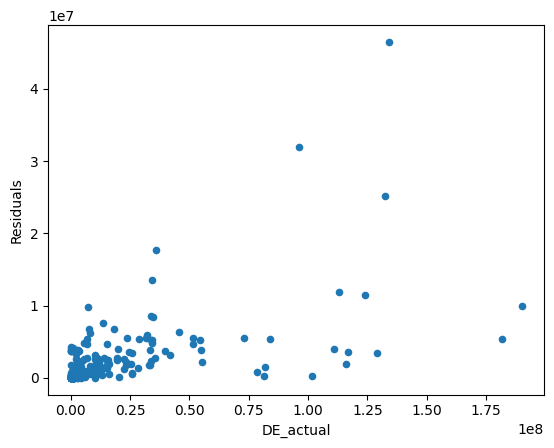

In [ ]:
df.plot(kind = "scatter", x = "DE_actual", y = "Residuals")

### emissionIntensiy

In [ ]:
features = ["OrgId",
 "FisYear",
 "derivedEmissions",
 'Energy Use Total',
 'ESG SCORE',
 'ESG Combined Score',
 'ESG Controversies Score',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score',
 'totalRevenue',
 'totalAssets',
 'employees',
 'grossProfit',
 'operatingIncome',
 'earningsBeforeTax',
 'propertyPlantEquipmentTotal',
 'totalDebt',
 'totalLiabilities',
 'commonStock',
 'netIncome',
 'ebitda',
 'enterpriseValue',
 'roa',
 'capex',
 'GDP PPP'
 ]

In [ ]:
x = data_numeric[features].set_index(["OrgId","FisYear"]) # Features
y = data_numeric[["emissionIntensity","FisYear","OrgId"]].set_index(["OrgId","FisYear"])  # Target

In [ ]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(x_train_scaled, y_train)

<ipython-input-192-effe11a9f295>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predicting the target values of the test set
y_pred = model.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  100.948


In [ ]:
df = pd.concat([y_test, pd.Series(y_pred, index = y_test.index)], axis = 1)
df.columns = ["DE_actual","DE_predicted"]
df["DE_predicted"] = df["DE_predicted"].map("{:.1f}".format).astype("float64")
df["Residuals"] = abs(df["DE_actual"] - df["DE_predicted"])

df = df.reset_index()
df = df.drop(columns = "OrgId")

In [ ]:
df

,FisYear,DE_actual,DE_predicted,Residuals
0,2017,2.529277,10.3,7.770723
1,2015,66.127857,71.3,5.172143
2,2021,10.369301,45.6,35.230699
3,2018,115.292072,161.1,45.807928
4,2019,58.560194,72.6,14.039806
...,...,...,...,...
739,2021,14.722365,22.8,8.077635
740,2018,29.879328,34.2,4.320672
741,2012,16.635832,47.2,30.564168
742,2015,17.976449,22.8,4.823551


<Axes: xlabel='DE_actual', ylabel='Residuals'>

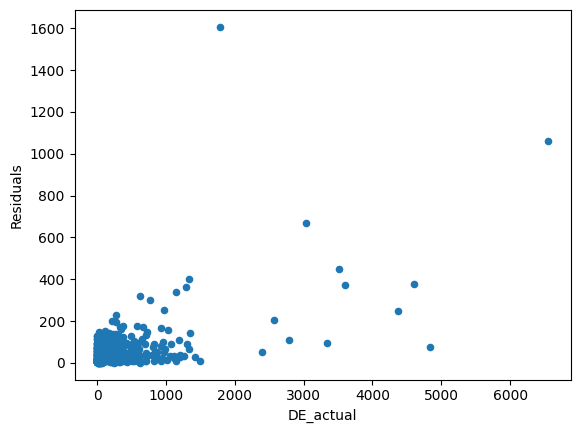

In [ ]:
df.plot(kind = "scatter", x = "DE_actual", y = "Residuals")

In [ ]:
# Halving Search
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30,40,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [50, 100, 150, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = HalvingGridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train_scaled, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 12
max_resources_: 2976
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 576
n_resources: 12
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
----------
iter: 1
n_candidates: 192
n_resources: 36
Fitting 3 folds for each of 192 candidates, totalling 576 fits
----------
iter: 2
n_candidates: 64
n_resources: 108
Fitting 3 folds for each of 64 candidates, totalling 192 fits
----------
iter: 3
n_candidates: 22
n_resources: 324
Fitting 3 folds for each of 22 candidates, totalling 66 fits
----------
iter: 4
n_candidates: 8
n_resources: 972
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 5
n_candidates: 3
n_resources: 2916
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


HalvingGridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'bootstrap': [True, False],
                                'max_depth': [10, 20, 30, 40, 50, None],
                                'max_features': ['auto', 'sqrt'],
                                'min_samples_leaf': [1, 2, 4],
                                'min_samples_split': [2, 5],
                                'n_estimators': [50, 100, 150, 200]},
                    random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
# Predicting the target values of the test set
y_pred = best_random.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  91.173


In [ ]:
{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
# Best Random HalvingGridSearch Model
best_random = RandomForestRegressor(n_estimators = 200, bootstrap = True, max_depth = 40, max_features = "auto", min_samples_leaf = 2, min_samples_split = 2, random_state = 0)

# Fitting the Random Forest Regression model to the data
best_random.fit(x_train_scaled, y_train)

<ipython-input-24-9777ba7a732c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_random.fit(x_train_scaled, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=40, max_features='auto', min_samples_leaf=2,
                      n_estimators=200, random_state=0)

In [ ]:
# Predicting the target values of the test set
y_pred = best_random.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  89.416


In [ ]:
# Detailed GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': ["auto"],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [2,4,6],
    'n_estimators': [150, 200, 250]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
# Predicting the target values of the test set
y_pred = best_grid.predict(x_test_scaled)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  89.184


In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [ ]:
{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [ ]:
df = pd.concat([y_test, pd.Series(y_pred, index = y_test.index)], axis = 1)
df.columns = ["EI_actual","EI_predicted"]
df["EI_predicted"] = df["EI_predicted"].map("{:.1f}".format).astype("float64")
df["Residuals"] = abs(df["EI_actual"] - df["EI_predicted"])

df = df.reset_index()
df = df.drop(columns = "OrgId")

In [ ]:
df

,FisYear,EI_actual,EI_predicted,Residuals
0,2017,2.529277,9.1,6.570723
1,2015,66.127857,74.0,7.872143
2,2021,10.369301,46.8,36.430699
3,2018,115.292072,155.8,40.507928
4,2019,58.560194,71.9,13.339806
...,...,...,...,...
739,2021,14.722365,22.3,7.577635
740,2018,29.879328,34.8,4.920672
741,2012,16.635832,43.8,27.164168
742,2015,17.976449,22.5,4.523551


<Axes: xlabel='EI_actual', ylabel='Residuals'>

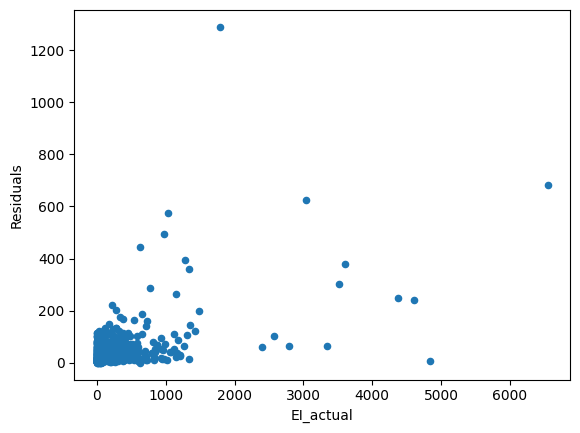

In [ ]:
df.plot(kind = "scatter", x = "EI_actual", y = "Residuals")

Tuning Hyperparamteres in RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30,40,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [50, 100, 150, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test.values, y_test.values)

<ipython-input-100-11093dbcfb1a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(x_train, y_train)


Model Performance
Average Error: 9587410.2279 degrees.
Accuracy = -13139.93%.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Predicting the target values of the test set
y_pred = base_model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  3834339.066


In [ ]:
best_random = rf_random.best_estimator_
base_accuracy = evaluate(best_random, x_test.values, y_test.values)

Model Performance
Average Error: 9518893.2749 degrees.
Accuracy = -12950.67%.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Predicting the target values of the test set
y_pred = best_random.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  4251791.349


### HalvingSearch -> GridSearch -> Predicting All emissionIntensity in the Data (FINAL MODEL)

In [ ]:
scaler.fit_transform(x)

array([[-0.15656664, -0.15083921,  1.36667327, ..., -0.52714072,
         1.04626457, -0.40145377],
       [-0.21451957, -0.18925514,  0.81566221, ...,  0.60417468,
         0.21688849,  0.49173665],
       [ 0.14413564,  0.15140377,  0.41729582, ..., -0.40664912,
         0.31801891, -0.40145377],
       ...,
       [-0.28735646, -0.27531115, -2.1306367 , ..., -0.52087643,
        -0.40263423, -0.37497532],
       [ 0.01843491,  0.02591361, -0.1361745 , ...,  0.24313371,
        -0.32680292,  0.41905308],
       [-0.21637712, -0.22184297, -1.74706103, ...,  0.34119323,
        -0.04886192,  0.41905308]])

In [ ]:
# Predicting the target values of the test set
y_pred = best_grid.predict(scaler.fit_transform(x))

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  84.702


In [ ]:
len(y)

3720

In [ ]:
len(y_pred)

3720

In [ ]:
df = pd.concat([y, pd.Series(y_pred, index = y.index)], axis = 1)
df.columns = ["EI_actual","EI_predicted"]
df["EI_predicted"] = df["EI_predicted"].map("{:.1f}".format).astype("float64")
df["Residuals"] = abs(df["EI_actual"] - df["EI_predicted"])

df = df.reset_index()
df = df.drop(columns = "OrgId")

In [ ]:
df

,FisYear,EI_actual,EI_predicted,Residuals
0,2009,22.943176,28.4,5.456824
1,2009,32.585547,35.1,2.514453
2,2009,181.513567,164.0,17.513567
3,2009,9.517167,17.0,7.482833
4,2009,264.560941,286.1,21.539059
...,...,...,...,...
3715,2016,5.748062,18.0,12.251938
3716,2016,61.187562,69.1,7.912438
3717,2016,229.857438,217.1,12.757438
3718,2016,439.661353,438.1,1.561353


<Axes: xlabel='EI_actual', ylabel='Residuals'>

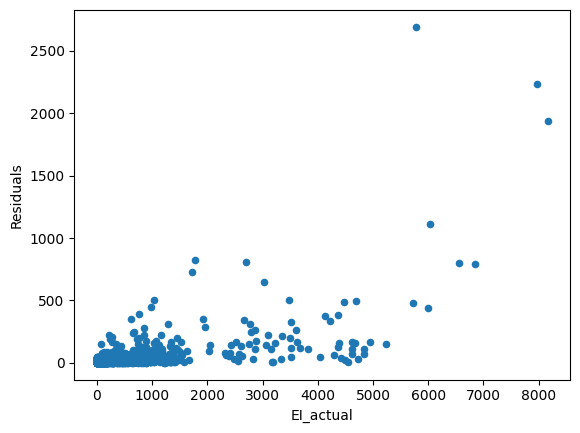

In [ ]:
df.plot(kind = "scatter", x = "EI_actual", y = "Residuals")

# 3. Clustering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#KMeans
from scipy.spatial import ConvexHull
from scipy import interpolate
from sklearn.cluster import KMeans
from sklearn import metrics

### 3.1. KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


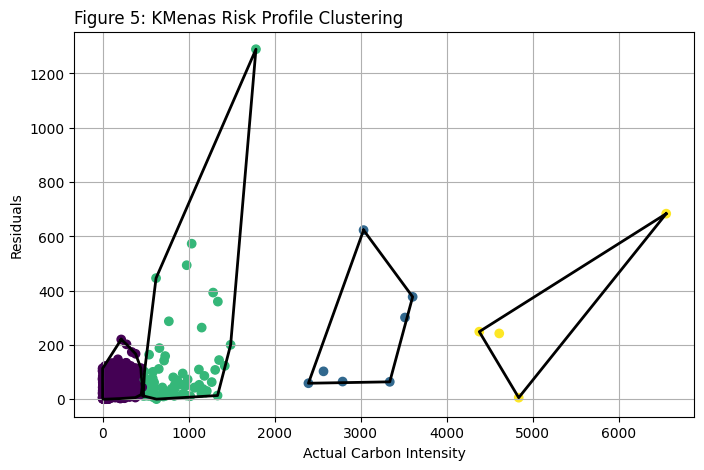

In [ ]:
# perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=4).fit(df[["EI_actual", "Residuals"]])
df['cluster'] = kmeans.labels_

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)

# create a scatter plot with different colors for each cluster
ax.scatter(df['EI_actual'], df['Residuals'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Actual Carbon Intensity')
ax.set_ylabel('Residuals')
ax.set_title("Figure 5: KMenas Risk Profile Clustering", loc = "left")
plot_cluster_border(df = df.copy(), variables = ["EI_actual","Residuals"], ax = ax)

plt.grid()
plt.show()

In [ ]:
df_info = pd.merge(left = df.copy(),
                   right = es600.copy(),
                   how = "left",
                   left_on = ["FisYear","EI_actual"],
                   right_on = ["FisYear","emissionIntensity"])

In [ ]:
pd.pivot_table(data = df_info[["OrgId","cluster","econIdDesc"]], index = "cluster", columns = "econIdDesc", aggfunc = "count")

OrgId                                                   \
econIdDesc Basic Materials Consumer Cyclicals Consumer Non-Cyclicals Energy   
cluster                                                                       
0                     70.0              121.0                   92.0   46.0   
1                      5.0                NaN                    NaN    1.0   
2                     24.0                4.0                    1.0   10.0   
3                      3.0                NaN                    NaN    NaN   

                                                                               
econIdDesc Financials Healthcare Industrials Real Estate Technology Utilities  
cluster                                                                        
0                11.0       57.0       153.0        13.0       86.0      19.0  
1                 NaN        NaN         NaN         NaN        NaN       1.0  
2                 NaN        NaN         9.0         NaN        NaN      26.0  
3                 NaN        NaN         NaN         NaN        NaN       1.0

In [ ]:
pd.pivot_table(data = df_info[["cluster","derivedEmissions"]], index = "cluster", values = "derivedEmissions", aggfunc = "mean")

,derivedEmissions
cluster,
0,1.807511e+06
1,7.817065e+07
2,2.636097e+07
3,1.099888e+08


In [ ]:
def create_kmeans_models(df: pd.DataFrame, iter_features: list, static_features: list, cluster_range: int):

    results_dict = {}

    cluster_range = cluster_range + 1


    for iter_feature in iter_features:

        results_dict[iter_feature] = {}

        for year in df.FisYear.sort_values().unique():

            results_dict[iter_feature][year] = {}

            train = df.loc[(df.FisYear == year), [iter_feature] + static_features].to_numpy()

            for n in range(2,cluster_range):

                results_dict[iter_feature][year][str(n)+"_clusters"] = {}

                #fitting KMeans model with n_clusters on the training data
                kmeans = KMeans(n_clusters = n, random_state = 0).fit(train)

                #defining silhouette score which is used for model evaulation
                silhouette_score = metrics.silhouette_score(train, kmeans.labels_, metric = 'euclidean')
                davies_bouldin_score = metrics.davies_bouldin_score(train, kmeans.labels_)

                #adding differnet model data and information to the dictionary
                results_dict[iter_feature][year][str(n)+"_clusters"]["model"] = kmeans
                results_dict[iter_feature][year][str(n)+"_clusters"]["score"] = kmeans.score
                results_dict[iter_feature][year][str(n)+"_clusters"]["inertia"] = kmeans.inertia_
                results_dict[iter_feature][year][str(n)+"_clusters"]["silhouette_score"] = silhouette_score
                results_dict[iter_feature][year][str(n)+"_clusters"]["DBI"] = davies_bouldin_score

    return results_dict

In [ ]:
def plot_cluster_border(df: pd.DataFrame, variables: list, ax: plt.axes):

    for i in df.cluster.unique():
        points = df.loc[(df.cluster == i), variables].values

        if len(points) > 2:
            # get convex hull
            hull = ConvexHull(points)
            # get x and y coordinates
            # repeat last point to close the polygon
            x_hull = np.append(points[hull.vertices,0],
                               points[hull.vertices,0][0])
            y_hull = np.append(points[hull.vertices,1],
                               points[hull.vertices,1][0])
            # plot shape
            ax.plot(x_hull, y_hull, '-', lw = 2, c = "black")


    return

In [ ]:
df = df.loc[df.FisYear.isin([2015,2016,2017,2018,2019,2020])]

In [ ]:
def plot_kmeans_subplots(results_dict: dict, variables: list, df: pd.DataFrame, cluster: str):

    fig = plt.figure(figsize = (15,12))

    # fig,axs = plt.subplots(nrows = 3, ncols = 2, figsize = (15,12), sharex = True, sharey = True)

    fig.suptitle(f'Financial Data Clustering STOXX600 {cluster}', fontsize = 20, fontweight = "bold", y = 1)


    for i, (iter_feature, years) in enumerate(results_dict.items()):

        for j, (year, model) in enumerate(years.items()):

            slice_df = df.loc[(df.FisYear == year), [iter_feature] + variables]

            train = slice_df.to_numpy()


            kmeans = results_dict[iter_feature][year][cluster]["model"]
            slice_df['cluster'] = kmeans.fit_predict(slice_df)

            cluster_centers = kmeans.cluster_centers_
            c1 = cluster_centers[:,0]
            c2 = cluster_centers[:,1]

            x = train[:,0]
            y = train[:,1]

            axs = fig.add_subplot(3,2,j+1)

            axs.scatter(x, y, c = kmeans.labels_,  cmap = "viridis", marker = "o")
            axs.scatter(c1, c2, marker = "x", color = "r", s = 100)

            plot_cluster_border(df = slice_df, variables = [iter_feature] + variables, ax = axs)


            axs.set_ylabel(f'{variables[0]} {str(year)}', fontsize = 12, fontweight = "bold")


    plt.tight_layout()
    plt.show()
    return

In [ ]:
%%capture
results_dict = create_kmeans_models(df = df.copy(),
                     iter_features = ["EI_actual"],
                     static_features = ["Residuals"],
                     cluster_range = 4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

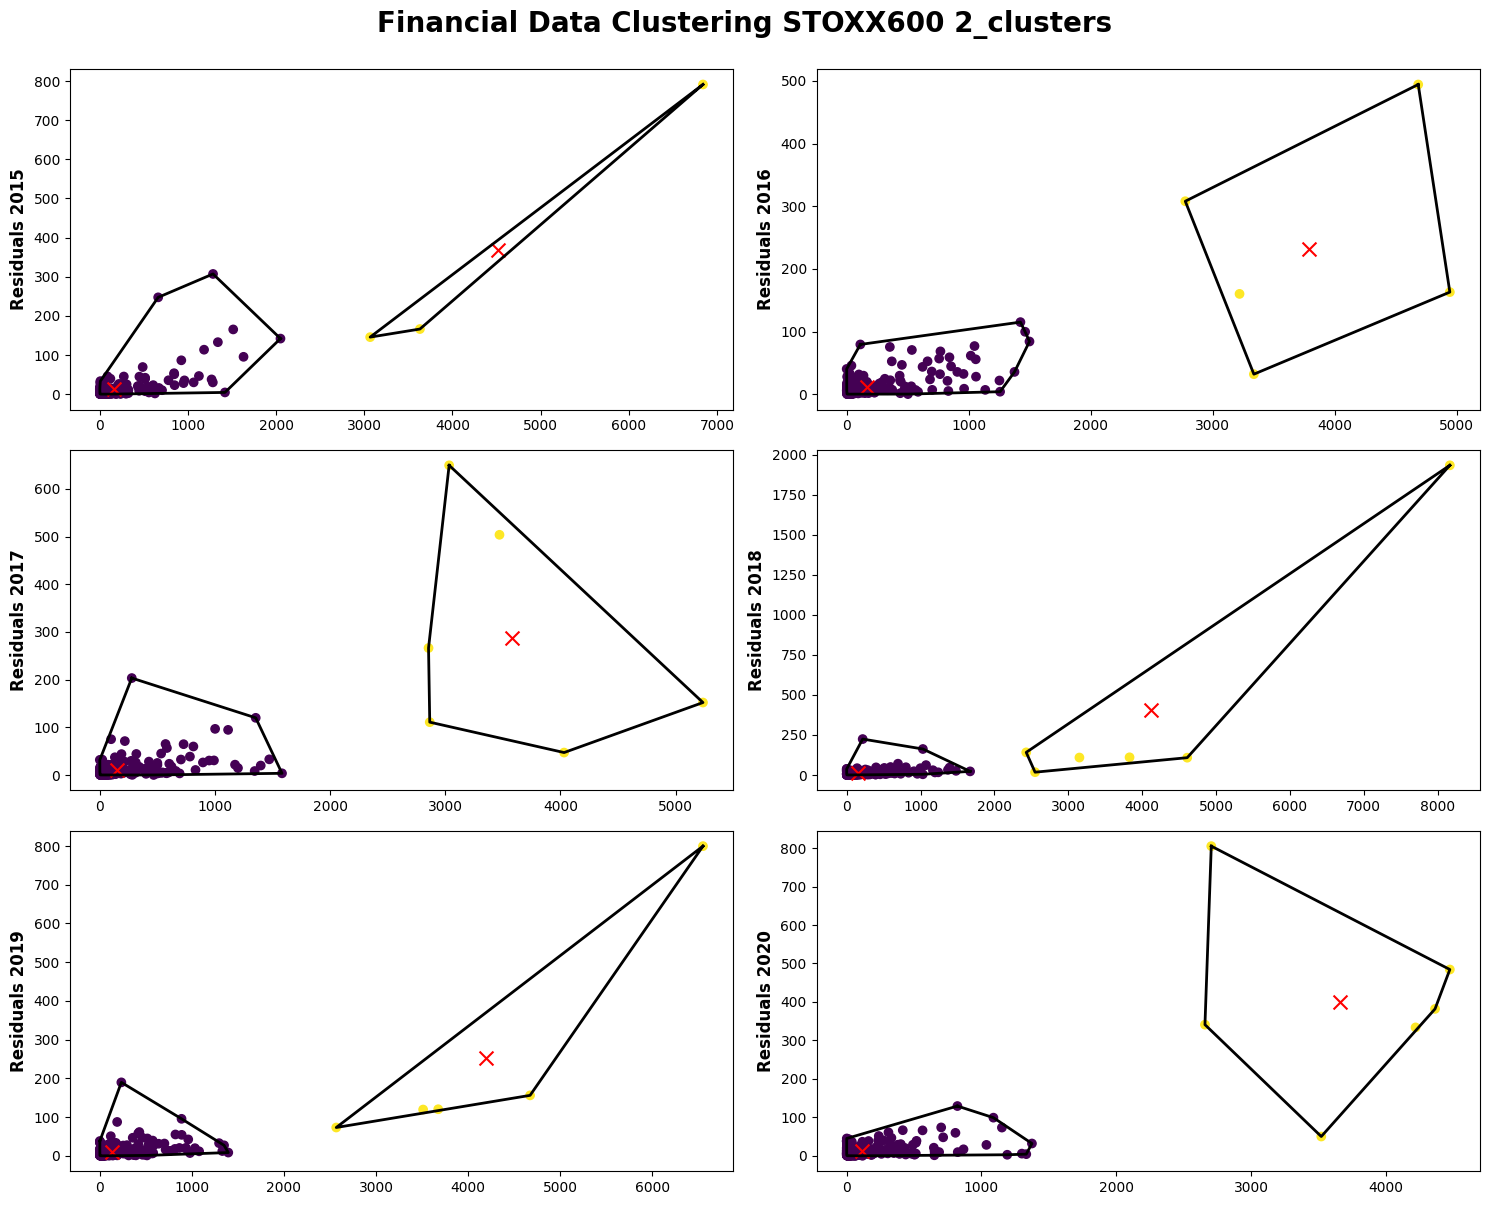

In [ ]:
plot_kmeans_subplots(results_dict = results_dict,
                     variables = ["Residuals"],
                     df = df.copy(),
                     cluster = "2_clusters")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

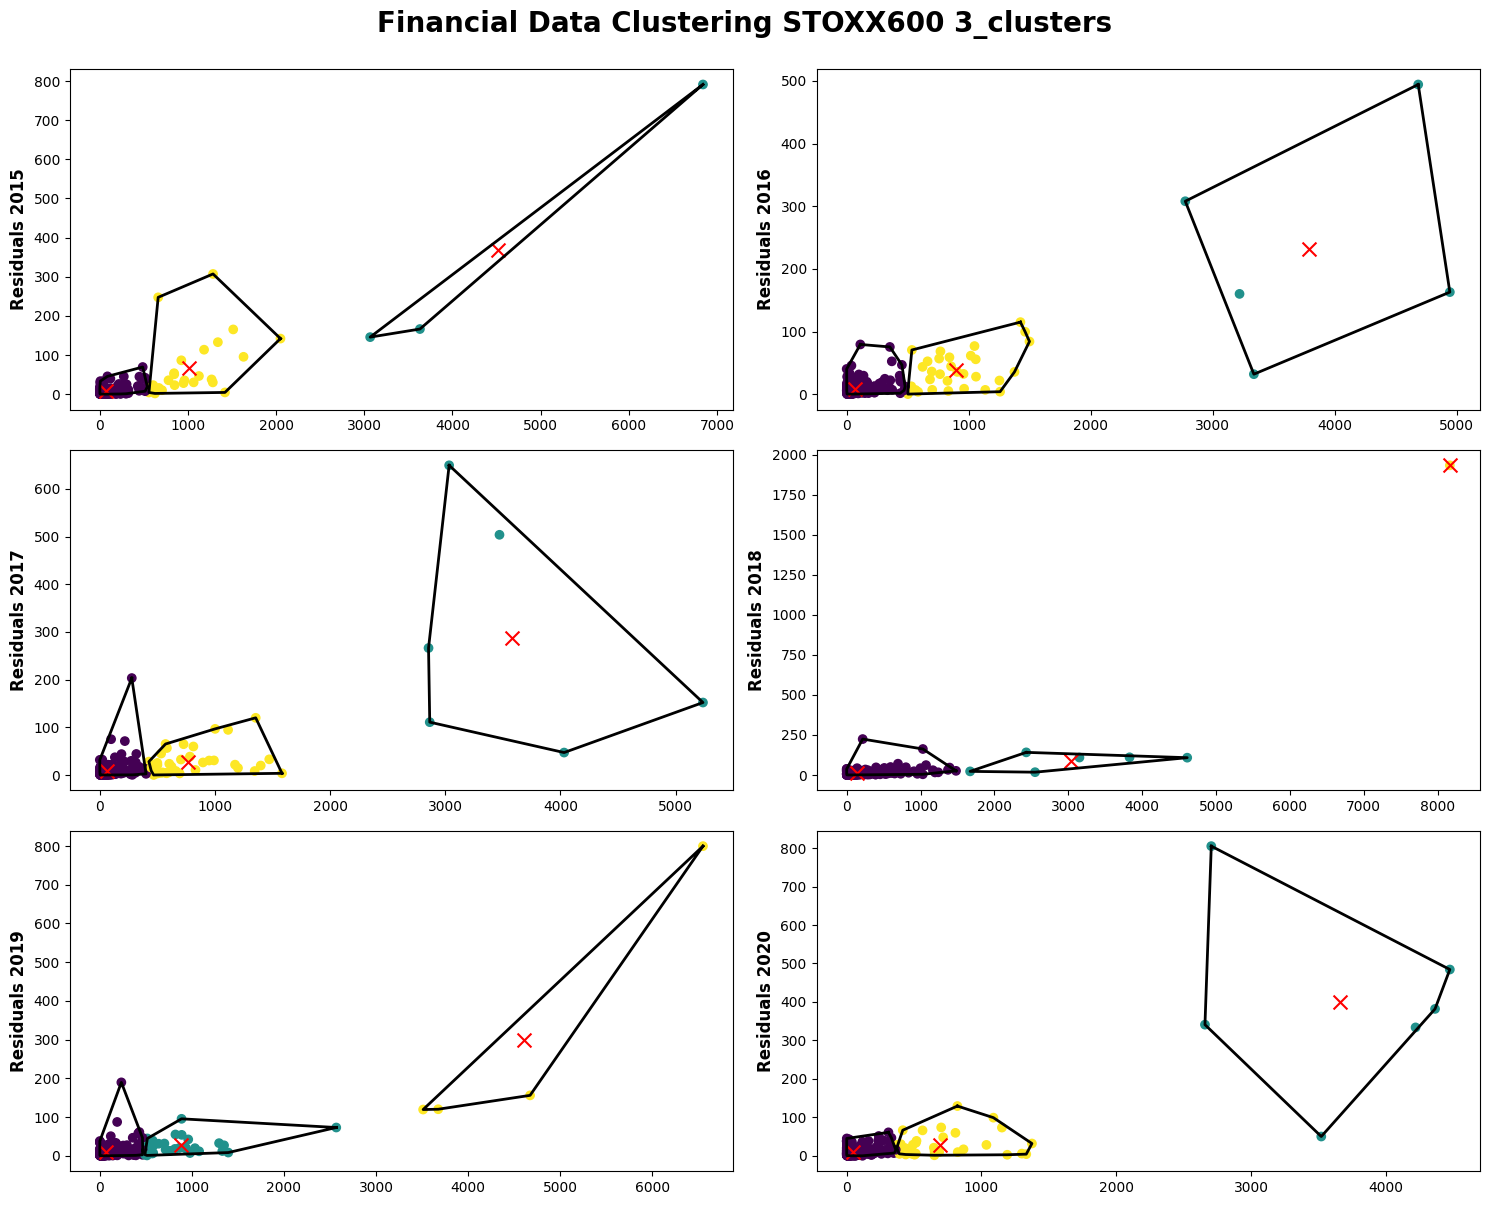

In [ ]:
plot_kmeans_subplots(results_dict = results_dict,
                     variables = ["Residuals"],
                     df = df.copy(),
                     cluster = "3_clusters")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

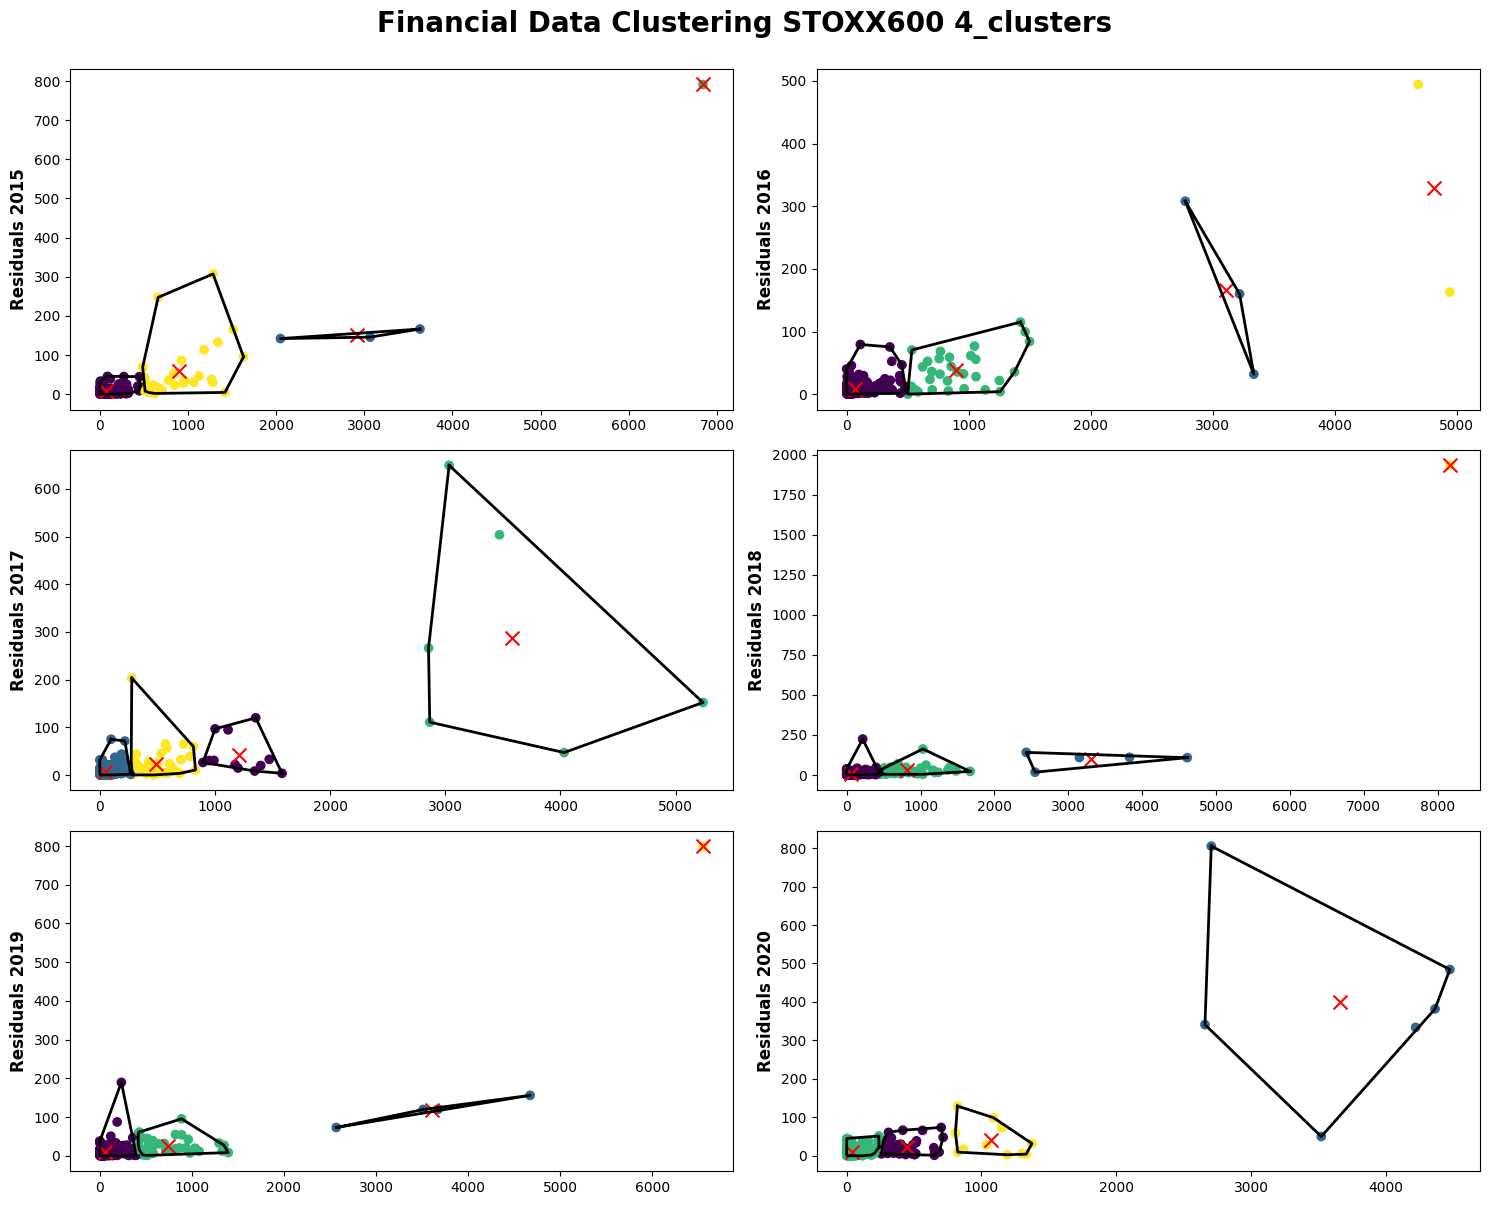

In [ ]:
plot_kmeans_subplots(results_dict = results_dict,
                     variables = ["Residuals"],
                     df = df.copy(),
                     cluster = "4_clusters")

### 3.2. Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
def create_hieararchical_models(df: pd.DataFrame, attributes: list, sample = False):

    from sklearn.preprocessing import StandardScaler
    from scipy.cluster.hierarchy import linkage, dendrogram

    results_dict = {}

    fig,axs = plt.subplots(nrows = 4, ncols = 4, figsize = (13,13))
    fig.suptitle(f'Figure 6: Hieararchical Data Clustering STOXX600: {(" and ".join(attributes))} ',
                 fontsize = 20,
                 #fontweight = "bold",
                 y = 1)


    for i, year in enumerate(df.FisYear.sort_values().unique()):

        results_dict[year] = {}

        slice_df = df.loc[df.FisYear == year, attributes]
        if sample == True:
            slice_df = slice_df.sample(n = 100)

        standard_scaler = StandardScaler()
        train = standard_scaler.fit_transform(slice_df)

        results_dict[year]["complete_clustering"] = linkage(train, method="complete", metric="euclidean")
        results_dict[year]["average_clustering"] = linkage(train, method="average", metric="euclidean")
        results_dict[year]["single_clustering"] = linkage(train, method="single", metric="euclidean")
        results_dict[year]["ward_clustering"] = linkage(train, method = "ward", metric = "euclidean")


        for j, (model_name, model) in enumerate(results_dict[year].items()):

            dendrogram(model, p = 5, truncate_mode = "lastp", orientation = 'left',
                       ax = axs[i,j], count_sort = "ascending")

            if i == 0:
                axs[i,j].set_title(model_name, fontsize = 15, fontweight = "bold")

            if j == 0:
                axs[i,j].set_ylabel(str(year), fontsize = 15, fontweight = "bold")
    plt.tight_layout()
    plt.show()

    return results_dict

In [ ]:
def plot_hierarchical_scatter(df: pd.DataFrame, results_dict: dict, attributes: list,
                              clustering: str, n_clusters: int):

    from scipy.cluster.hierarchy import fcluster

    df = df[["FisYear"] + attributes].copy()

    fig,axs = plt.subplots(nrows = 6, ncols = 2, figsize = (14,20))
    fig.suptitle(f'Hieararchical {clustering.replace("_", " ")} STOXX600: {(" and ".join(attributes))} ',
                 fontsize = 20, fontweight = "bold", y = 1)

    for i, year in enumerate(df.FisYear.sort_values().unique()):

        slice_df = df.loc[(df.FisYear == year), attributes]

        array = slice_df.to_numpy()

        lnk = results_dict[year][clustering]

        fc = fcluster(lnk, n_clusters, criterion = 'maxclust')
        slice_df["cluster"] = fc

        dendrogram(lnk, p = n_clusters, truncate_mode = "lastp", orientation = 'left',
                       ax = axs[i,0], count_sort = "ascending")


        plot_cluster_border(df = slice_df, variables = attributes, ax = axs[i,1])
        axs[i,1].scatter(array[:,0], array[:,1], c = fc)

        axs[i,0].set_ylabel(f'{year}', fontsize = 15, fontweight = "bold")


    plt.tight_layout()
    plt.show()

    return

In [ ]:
df_2017_2020 = df.loc[df.FisYear.isin([2017,2018,2019,2020])]

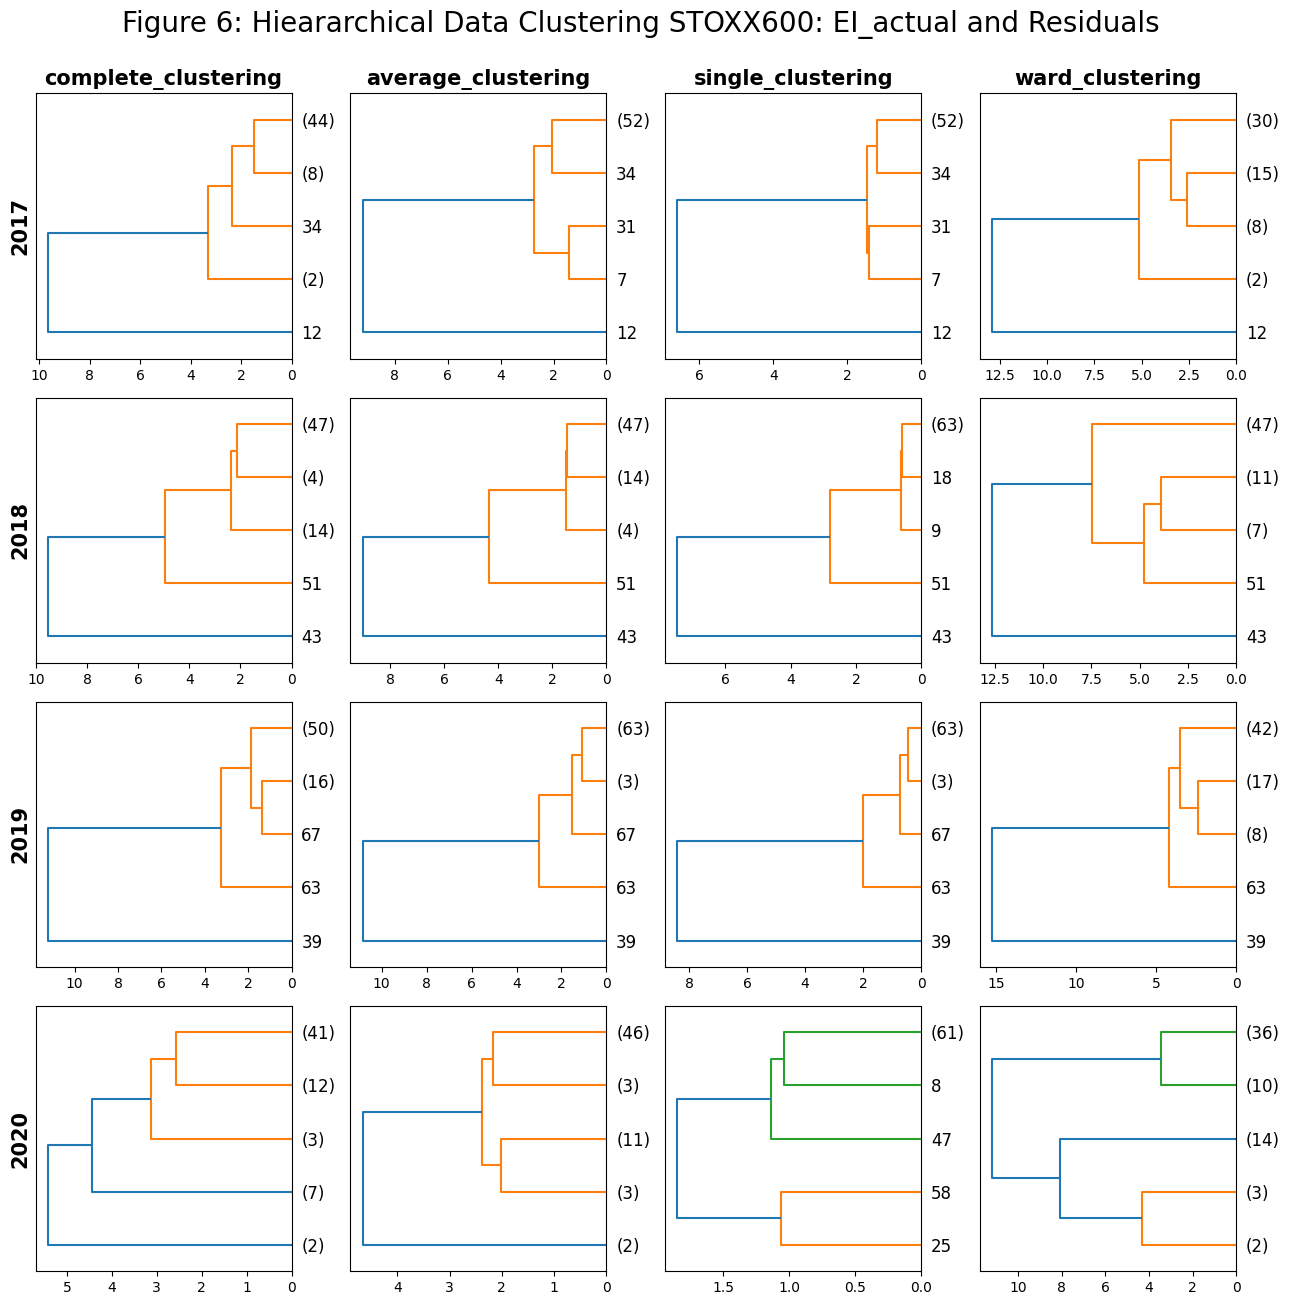

In [ ]:
results_dict_TR = create_hieararchical_models(df = df_2017_2020.copy(), attributes = ["EI_actual", "Residuals"])

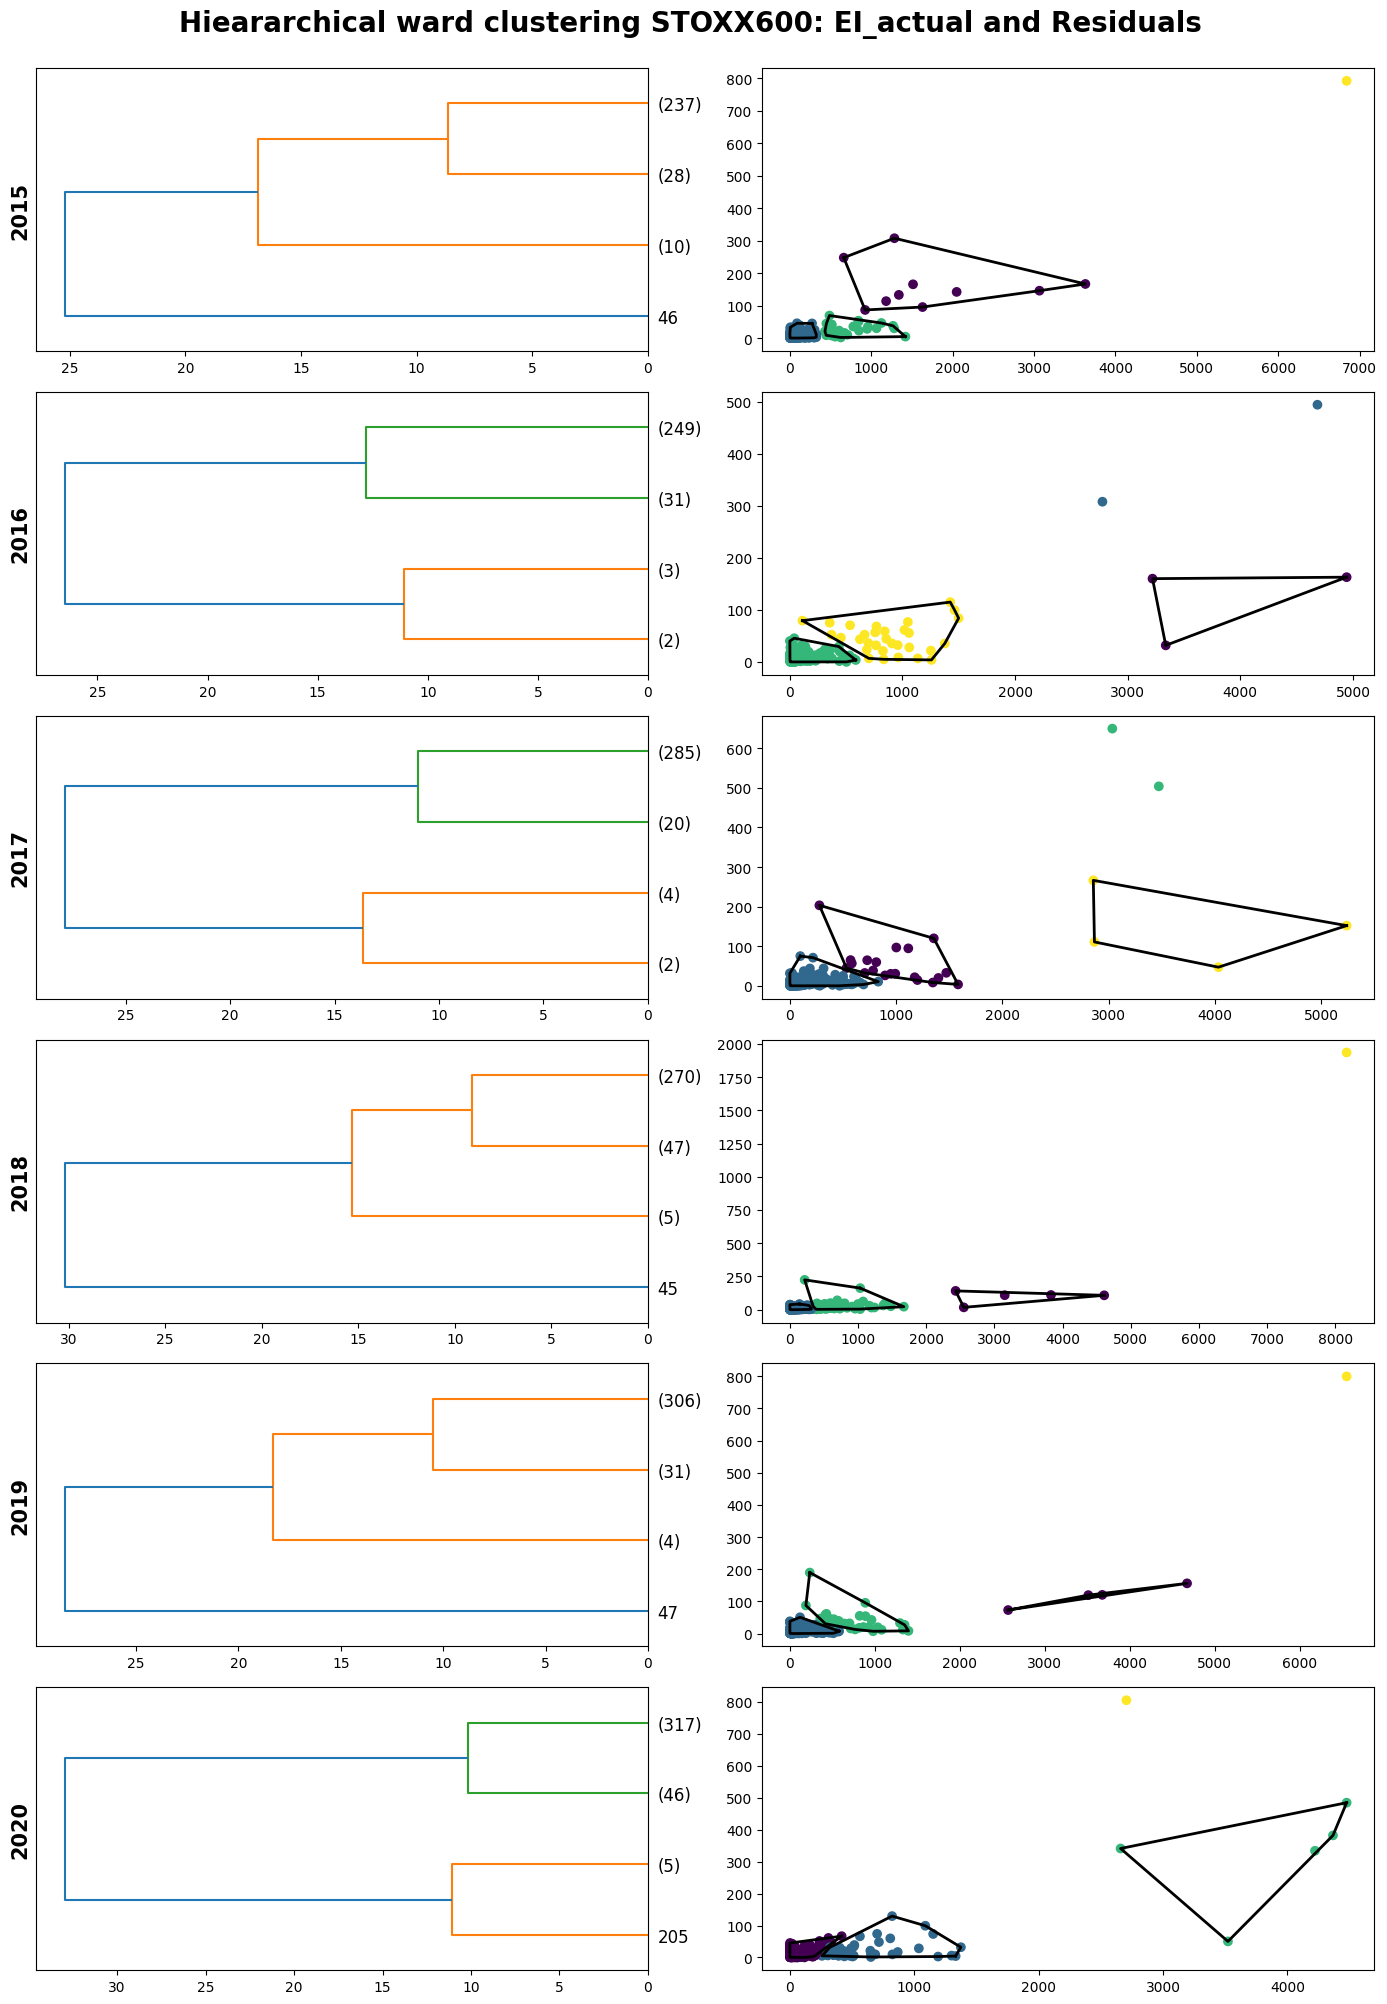

In [ ]:
plot_hierarchical_scatter(df = df.copy(),
                          results_dict = results_dict_TR,
                          attributes = ["EI_actual","Residuals"],
                          clustering = "ward_clustering",
                          n_clusters = 4)

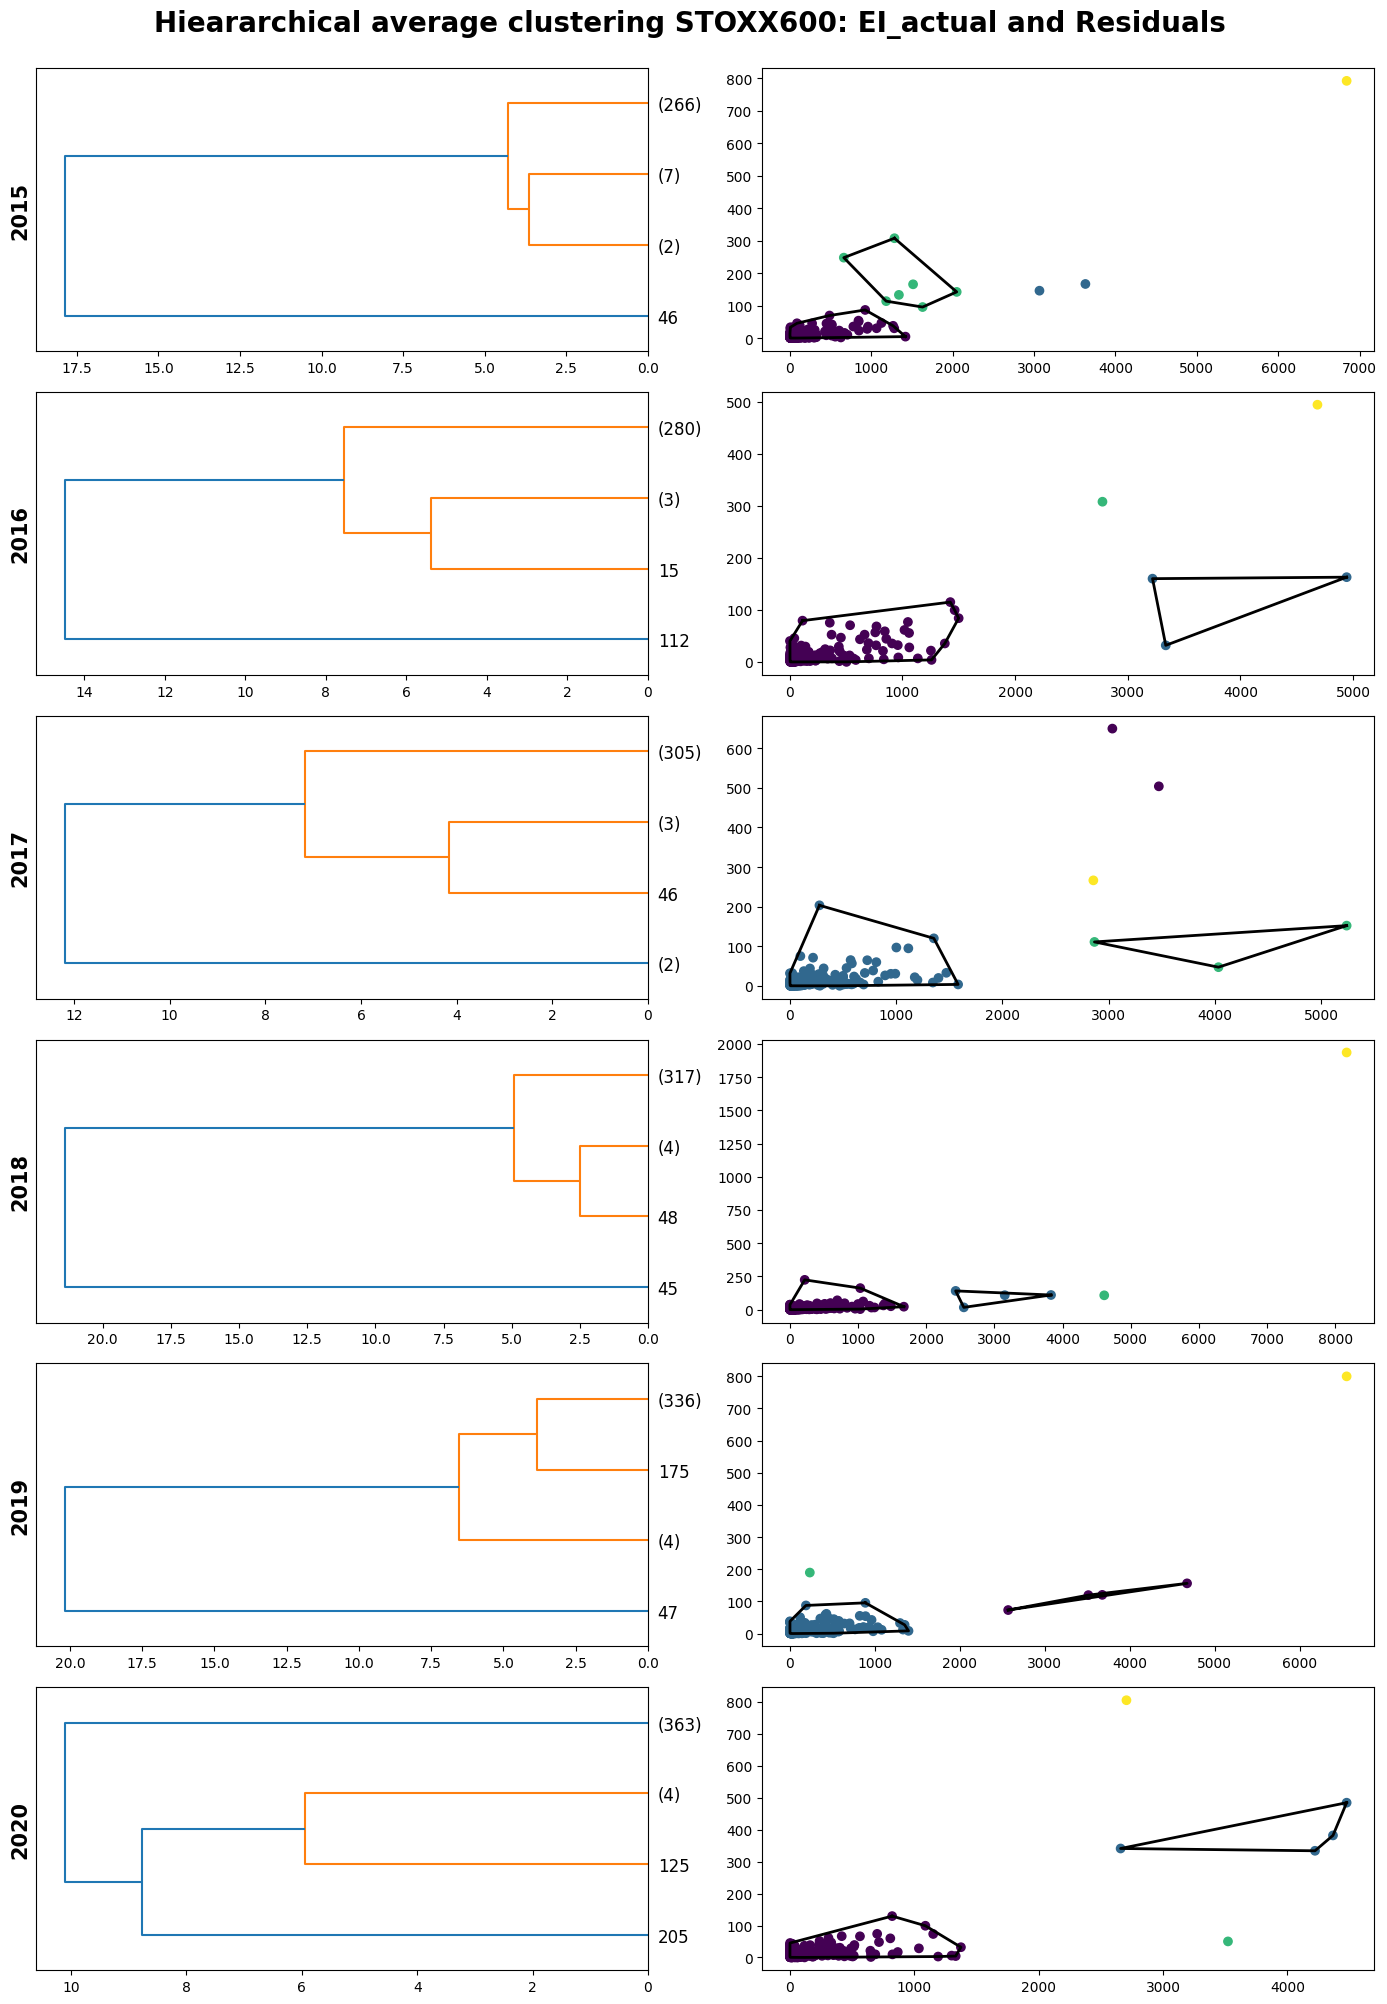

In [ ]:
plot_hierarchical_scatter(df = df.copy(),
                          results_dict = results_dict_TR,
                          attributes = ["EI_actual","Residuals"],
                          clustering = "average_clustering",
                          n_clusters = 4)

In [ ]:
df.head(1)

,FisYear,EI_actual,EI_predicted,Residuals
711,2017,17.127479,19.9,2.772521
